In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
import sklearn
import math
import seaborn as sns
from io import StringIO
import time

In [2]:
datafile = 'HR_Employee_Attrition_Data.csv'
df=pd.read_csv(datafile)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,...,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1470.500000,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.133819,403.440447,8.105485,1.023991,0.0,848.849221,1.092896,20.325969,0.711440,1.106752,...,1.081025,0.0,0.851932,7.779458,1.289051,0.706356,6.125483,3.622521,3.221882,3.567529
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,735.750000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1470.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,2205.250000,4.000000,84.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2940.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   BusinessTravel            2940 non-null   object
 3   DailyRate                 2940 non-null   int64 
 4   Department                2940 non-null   object
 5   DistanceFromHome          2940 non-null   int64 
 6   Education                 2940 non-null   int64 
 7   EducationField            2940 non-null   object
 8   EmployeeCount             2940 non-null   int64 
 9   EmployeeNumber            2940 non-null   int64 
 10  EnvironmentSatisfaction   2940 non-null   int64 
 11  Gender                    2940 non-null   object
 12  HourlyRate                2940 non-null   int64 
 13  JobInvolvement            2940 non-null   int64 
 14  JobLevel                

In [5]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [9]:
df.shape

(2940, 35)

In [10]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [11]:
# replacing character to binary 1 and 0

def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    res_df['Attrition']= le.fit_transform(res_df['Attrition'])
    res_df['BusinessTravel']= le.fit_transform(res_df['BusinessTravel'])
    res_df['Department']= le.fit_transform(res_df['Department'])
    res_df['EducationField']= le.fit_transform(res_df['EducationField'])
    res_df['Gender']= le.fit_transform(res_df['Gender'])
    res_df['JobRole']= le.fit_transform(res_df['JobRole'])
    res_df['MaritalStatus']= le.fit_transform(res_df['MaritalStatus'])
    res_df['OverTime']= le.fit_transform(res_df['OverTime'])
    return res_df

In [13]:
encoded_df=preprocessor(df)
encoded_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,5,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,36,0,1,884,1,23,2,3,1,2936,...,3,80,1,17,3,3,5,2,0,3
2936,39,0,2,613,1,6,1,3,1,2937,...,1,80,1,9,5,3,7,7,1,7
2937,27,0,2,155,1,4,3,1,1,2938,...,2,80,1,6,0,3,6,2,0,3
2938,49,0,1,1023,2,2,3,3,1,2939,...,4,80,0,17,3,2,9,6,0,8


<AxesSubplot:>

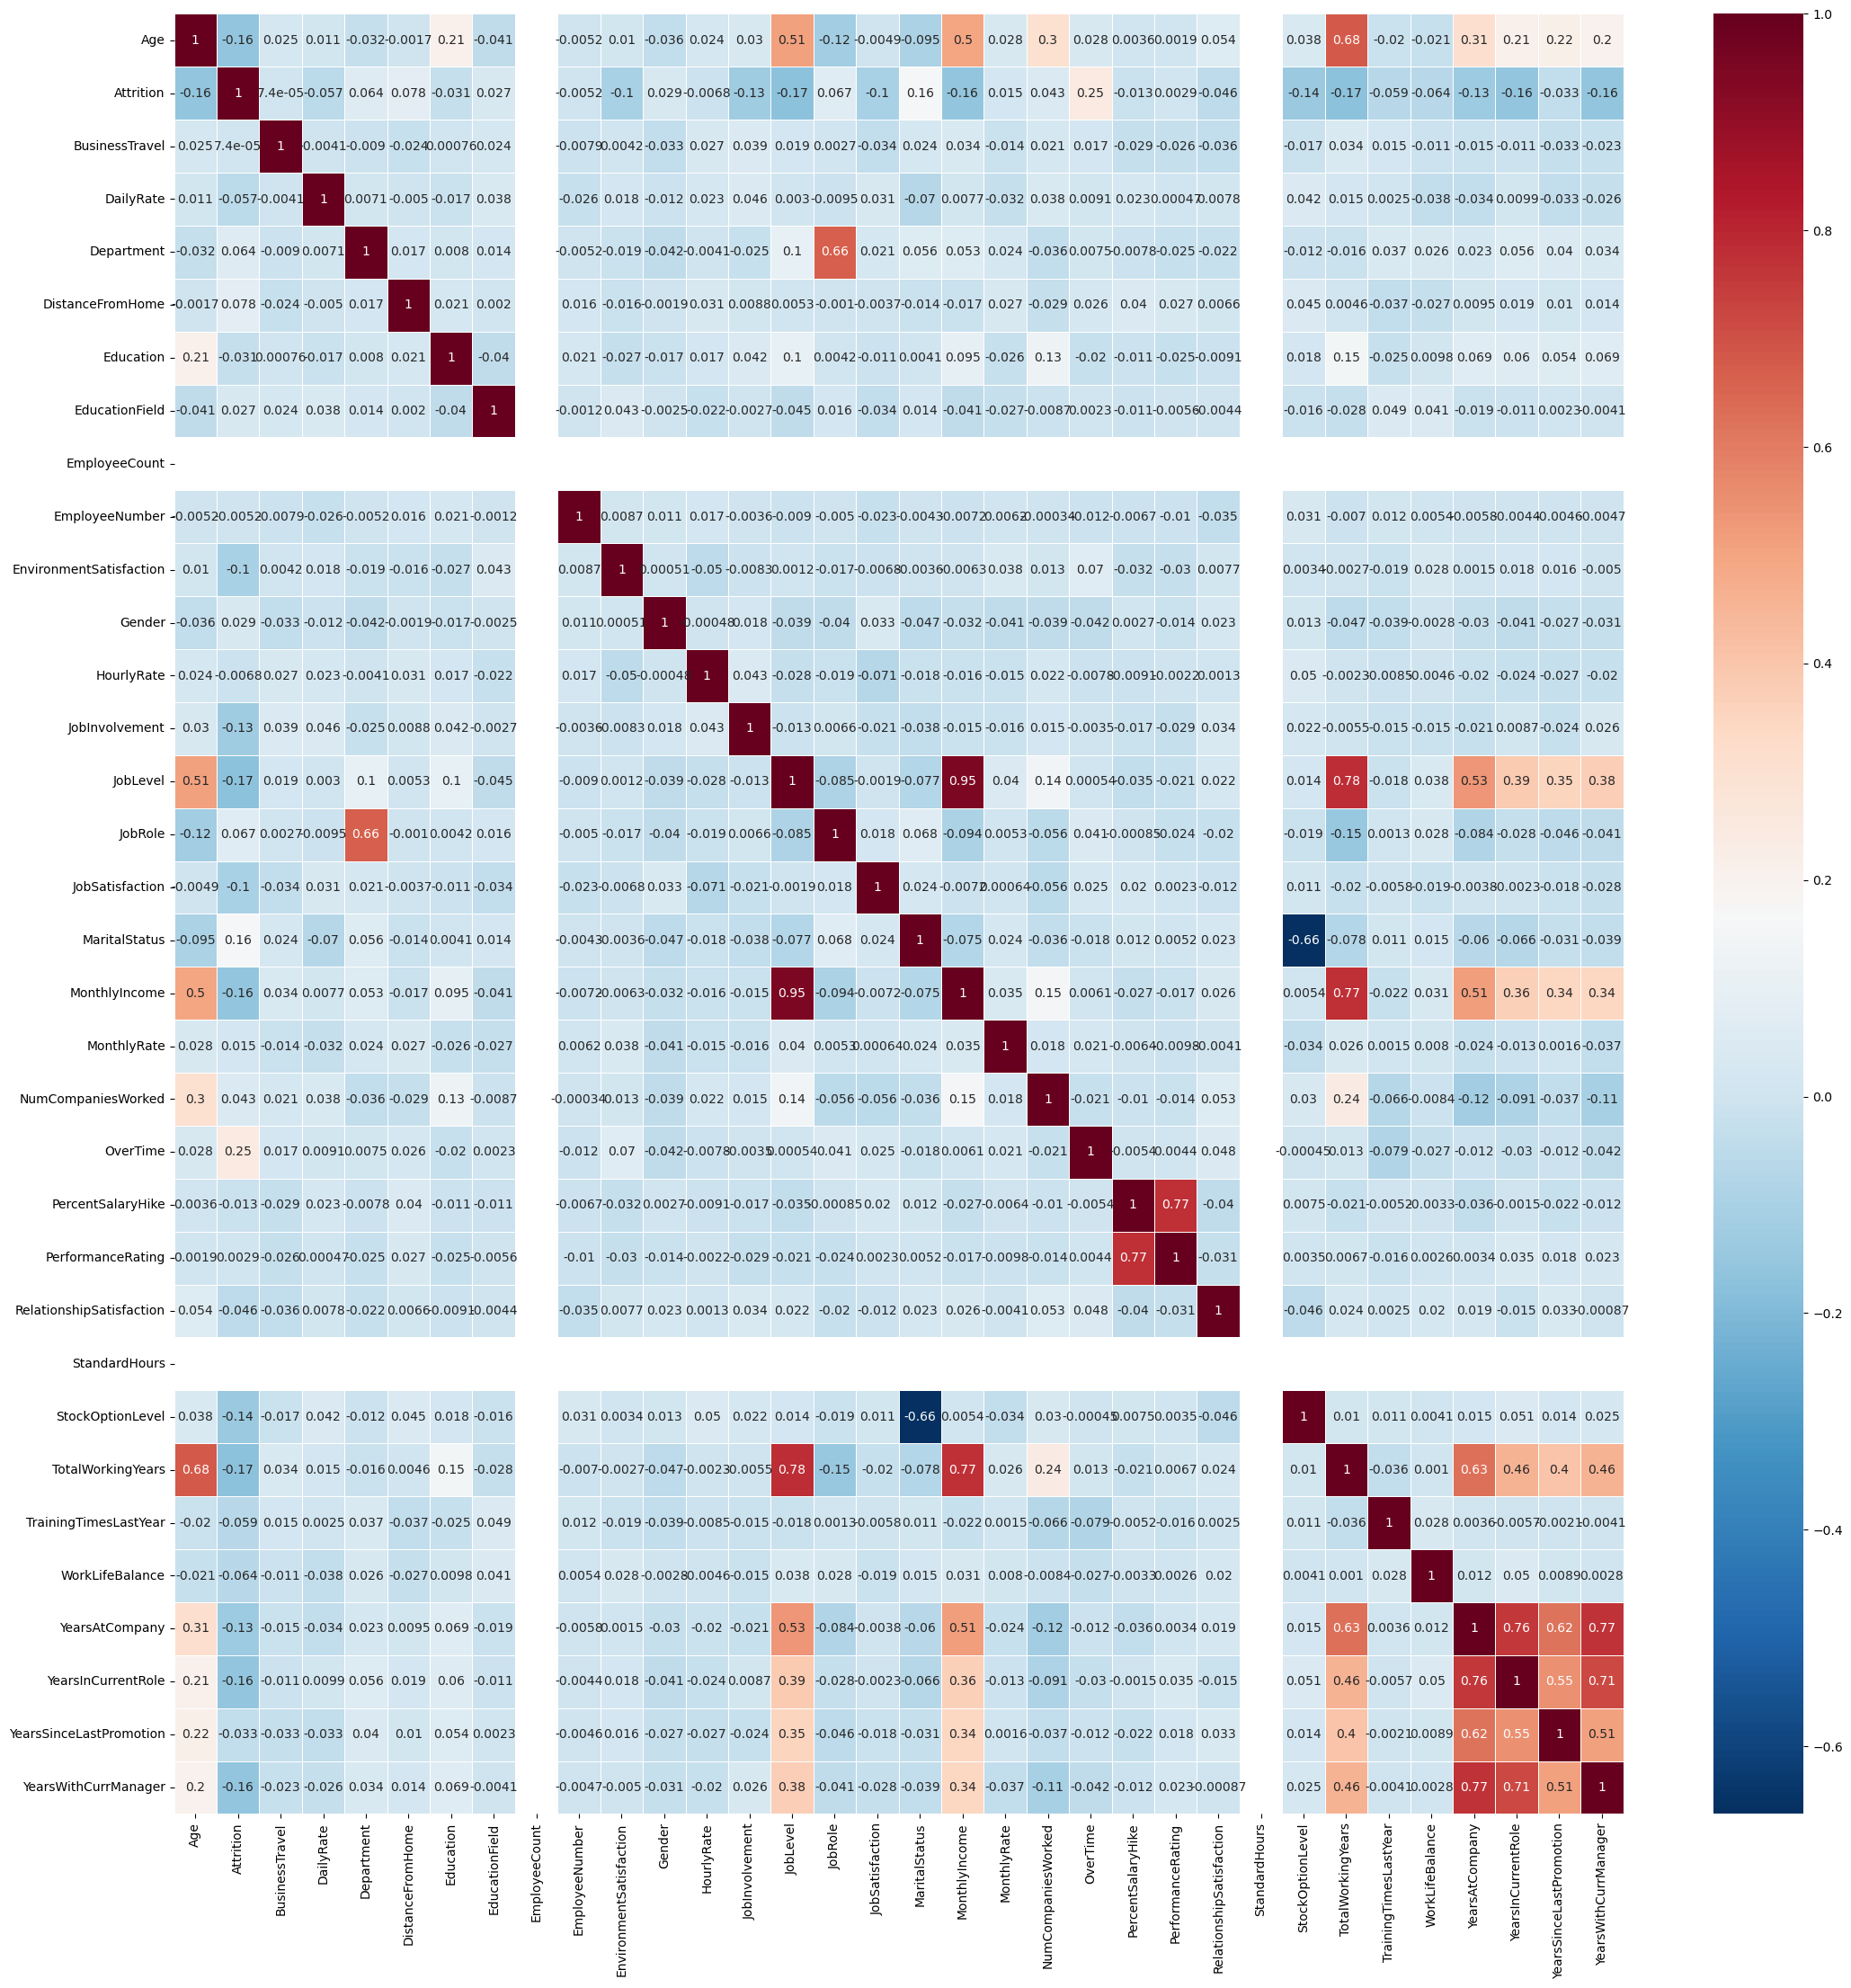

In [14]:
# After we changed all the categorical variables to numerical using mean encoding, 
# we can run pairwise correlation again to see the correlation between all the variables
pearson = encoded_df.corr(method='pearson')
pearson
plt.figure(figsize=(26, 26))
sns.heatmap(pearson, 
            xticklabels=pearson.columns,
            yticklabels=pearson.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

C:\Users\Ekbal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

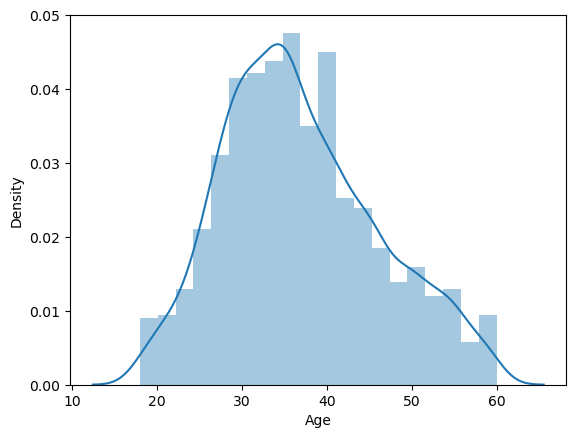

In [18]:
sns.distplot(encoded_df.Age, bins = 20) 

C:\Users\Ekbal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='Density'>

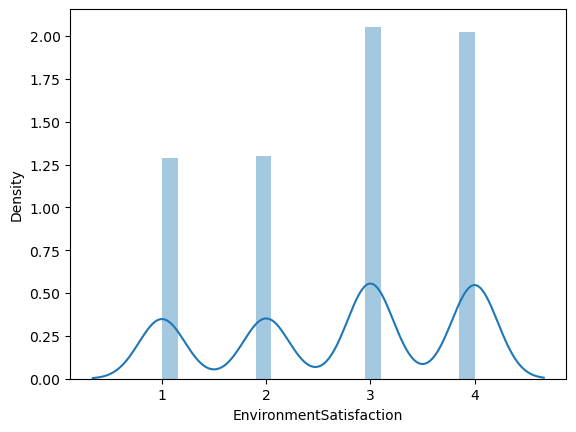

In [20]:
sns.distplot(encoded_df.EnvironmentSatisfaction, bins = 20) 

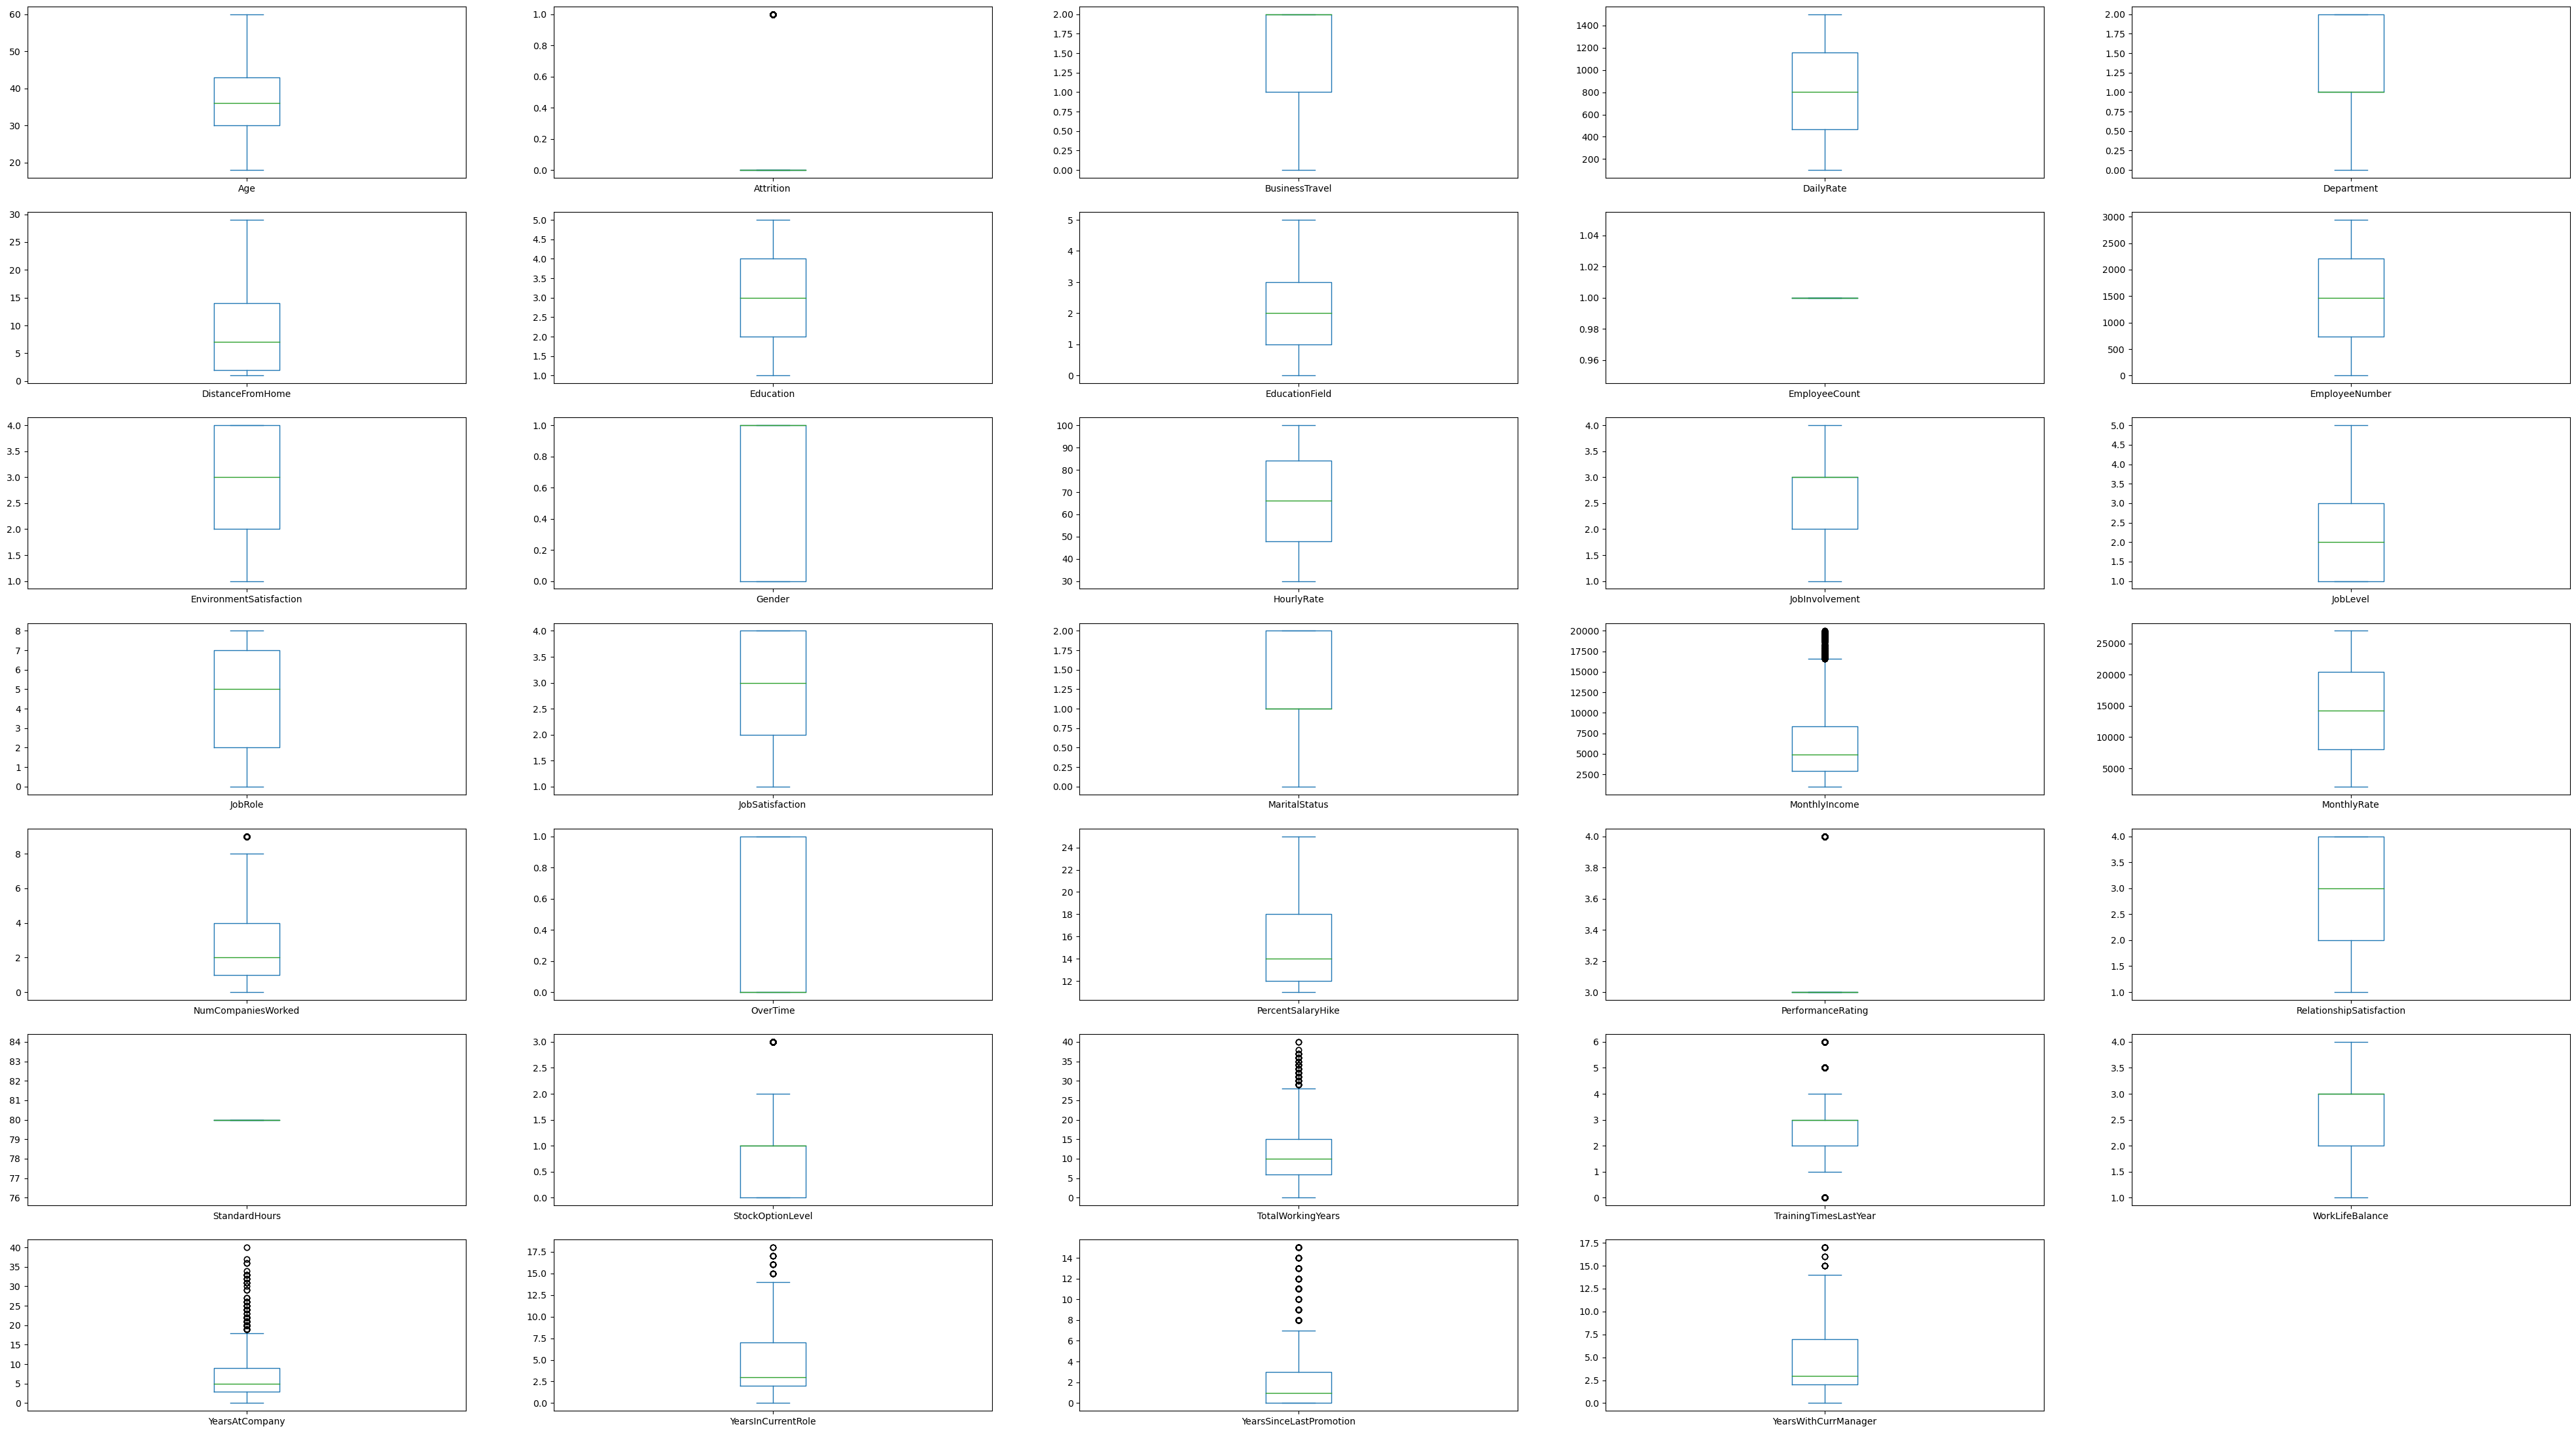

In [51]:
encoded_df.plot(kind="box",subplots=True,layout=(10,5),figsize=(50,40));

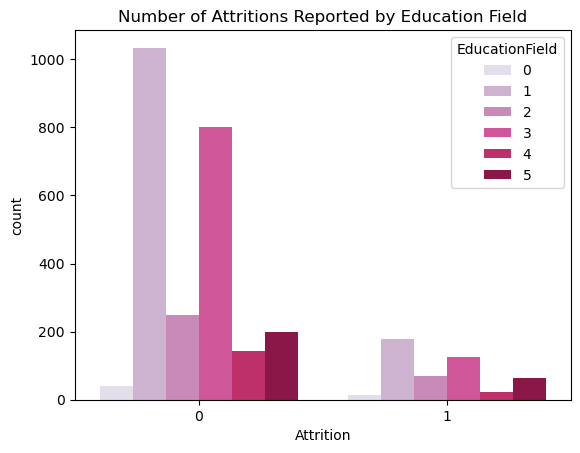

In [26]:
sns.countplot(x=encoded_df['Attrition'],
              hue='EducationField',
              data=encoded_df, palette = 'PuRd')
plt.title("Number of Attritions Reported by Education Field")
plt.show()

In [23]:
encoded_df[(encoded_df["Attrition"] == 1)].groupby(["EducationField"]).size() / encoded_df.groupby(["EducationField"]).size()

EducationField
0    0.259259
1    0.146865
2    0.220126
3    0.135776
4    0.134146
5    0.242424
dtype: float64

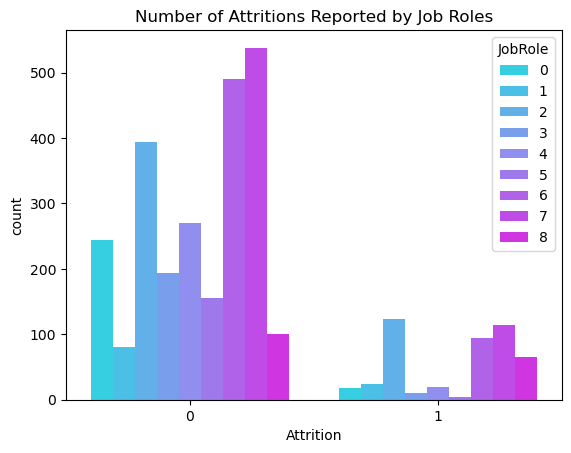

In [25]:
sns.countplot(x=encoded_df['Attrition'],
              hue='JobRole',
              data=encoded_df, 
              palette = 'cool')
plt.title("Number of Attritions Reported by Job Roles")
plt.show()

In [28]:
encoded_df[(encoded_df["Attrition"] == 1)].groupby(["JobRole"]).size() / encoded_df.groupby(["JobRole"]).size()

JobRole
0    0.068702
1    0.230769
2    0.239382
3    0.049020
4    0.068966
5    0.025000
6    0.160959
7    0.174847
8    0.397590
dtype: float64

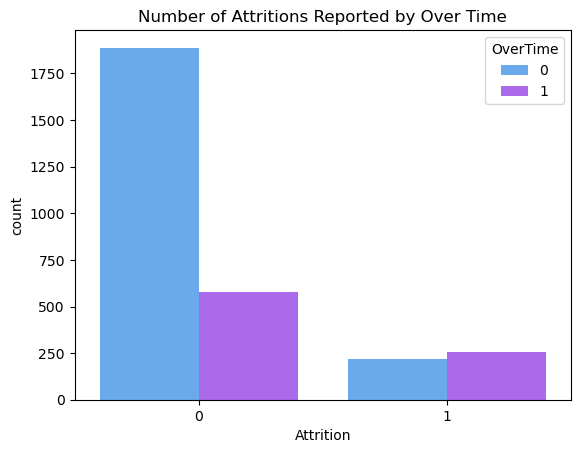

In [29]:
sns.countplot(x=encoded_df['Attrition'],
              hue='OverTime',
              data=encoded_df, 
              palette = 'cool')
plt.title("Number of Attritions Reported by Over Time")
plt.show()

In [30]:
encoded_df[(encoded_df["Attrition"] == 1)].groupby(["OverTime"]).size() / encoded_df.groupby(["OverTime"]).size()

OverTime
0    0.104364
1    0.305288
dtype: float64

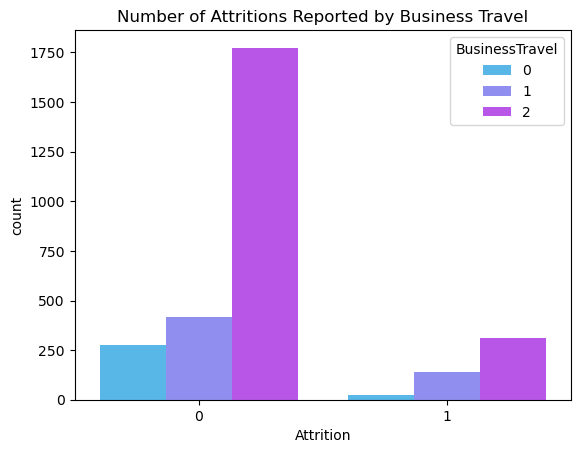

In [31]:
sns.countplot(x=encoded_df['Attrition'],
             hue = 'BusinessTravel',
             data = encoded_df,
             palette='cool')
plt.title("Number of Attritions Reported by Business Travel")
plt.show()

In [32]:
encoded_df[(encoded_df["Attrition"] == 1)].groupby(["BusinessTravel"]).size() / encoded_df.groupby(["BusinessTravel"]).size()

BusinessTravel
0    0.080000
1    0.249097
2    0.149569
dtype: float64

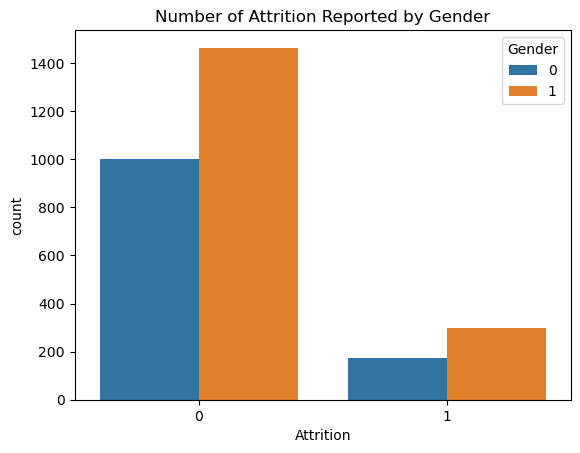

In [33]:
sns.countplot(x=encoded_df['Attrition'],
             hue='Gender',
             data=encoded_df)
plt.title('Number of Attrition Reported by Gender')
plt.show()

In [35]:
encoded_df[(encoded_df['Attrition']==1)].groupby(['Gender']).size()/encoded_df.groupby(['Gender']).size()

Gender
0    0.147959
1    0.170068
dtype: float64

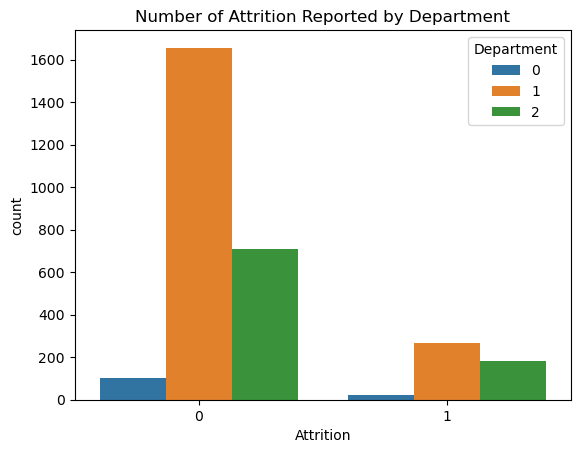

In [36]:
sns.countplot(x=encoded_df['Attrition'],
             hue='Department',
             data=encoded_df)
plt.title('Number of Attrition Reported by Department')
plt.show()

In [40]:
encoded_df[(encoded_df['Attrition']==1)].groupby(['Department']).size()/encoded_df.groupby(['Department']).size()

Department
0    0.190476
1    0.138398
2    0.206278
dtype: float64

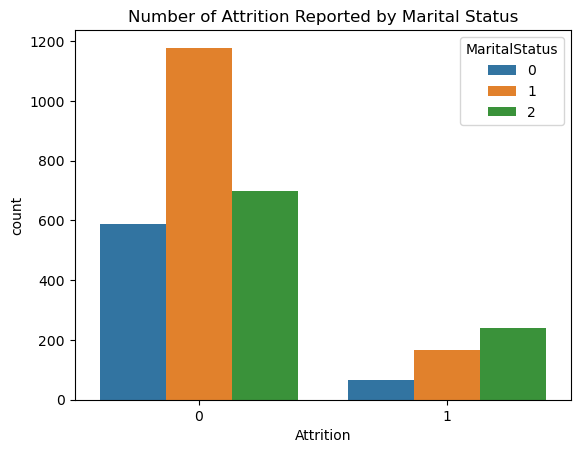

In [42]:
sns.countplot(x=encoded_df['Attrition'],
             hue='MaritalStatus',
             data=encoded_df)
plt.title('Number of Attrition Reported by Marital Status')
plt.show()

In [53]:
encoded_df[(encoded_df["Attrition"]==1)].groupby(["MaritalStatus"]).size()/encoded_df.groupby(['MaritalStatus']).size()

MaritalStatus
0    0.100917
1    0.124814
2    0.255319
dtype: float64

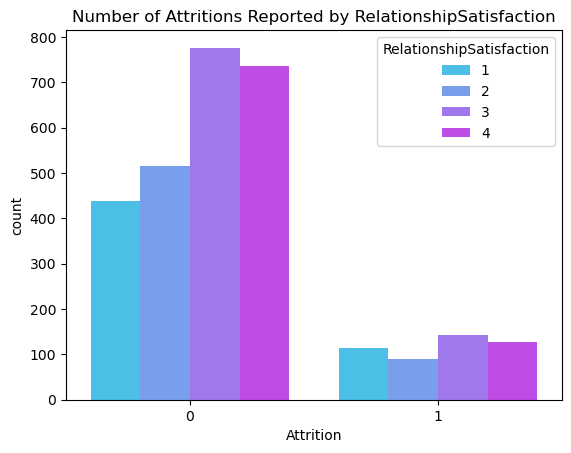

In [54]:
sns.countplot(x=encoded_df['Attrition'],
             hue = "RelationshipSatisfaction",
             data = encoded_df,
             palette="cool")
plt.title("Number of Attritions Reported by RelationshipSatisfaction")
plt.show()

In [55]:
encoded_df[(encoded_df["Attrition"]==1)].groupby(["RelationshipSatisfaction"]).size()/encoded_df.groupby(['RelationshipSatisfaction']).size()

RelationshipSatisfaction
1    0.206522
2    0.148515
3    0.154684
4    0.148148
dtype: float64

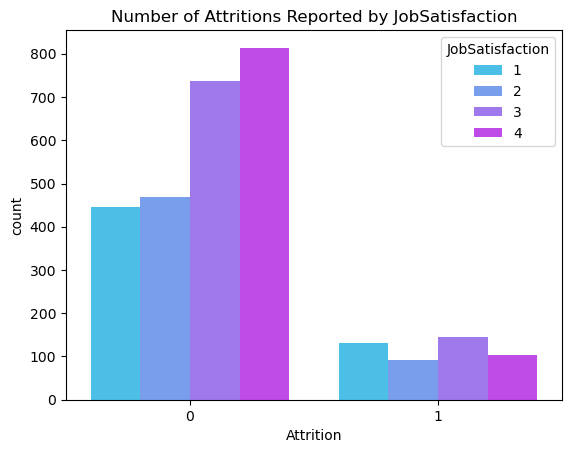

In [56]:
sns.countplot(x=encoded_df['Attrition'],
             hue = "JobSatisfaction",
             data = encoded_df,
             palette="cool")
plt.title("Number of Attritions Reported by JobSatisfaction")
plt.show()

In [57]:
encoded_df[(encoded_df["Attrition"]==1)].groupby(["JobSatisfaction"]).size()/encoded_df.groupby(['JobSatisfaction']).size()

JobSatisfaction
1    0.228374
2    0.164286
3    0.165158
4    0.113290
dtype: float64

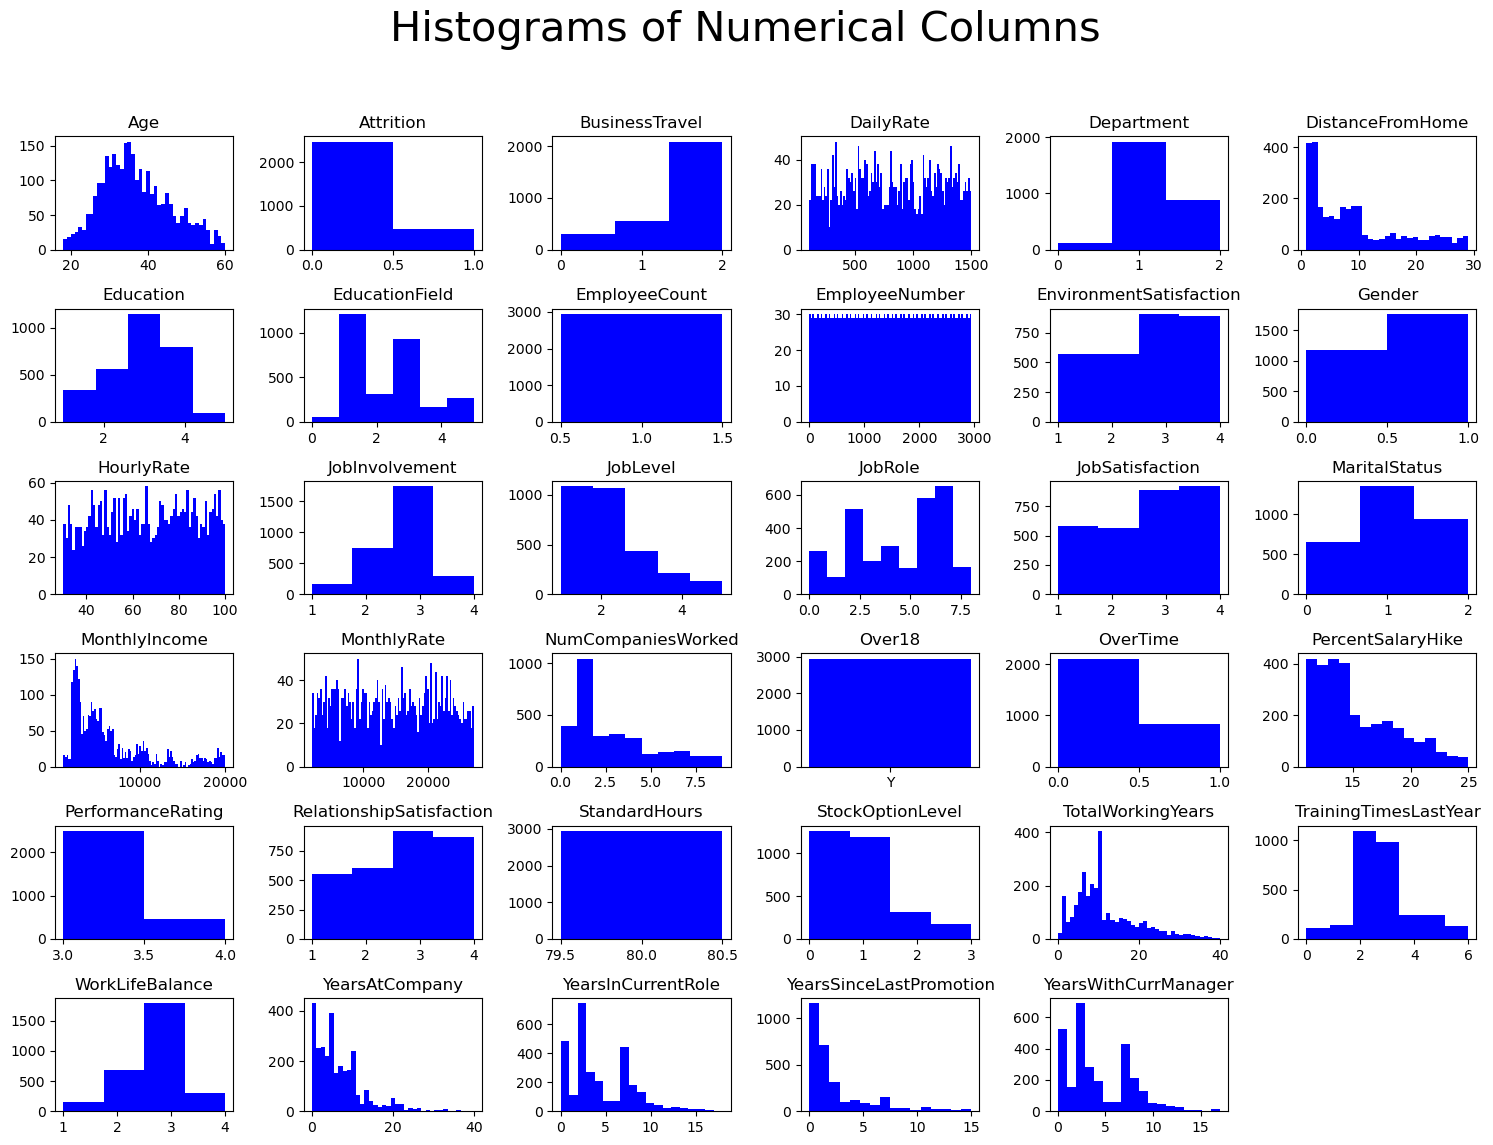

In [60]:
encoded_df
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns', fontsize=30)
for i in range(encoded_df.shape[1]):
    plt.subplot(6, 6, i + 1)
    f = plt.gca()
    f.set_title(encoded_df.columns.values[i])

    vals = np.size(encoded_df.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    
    plt.hist(encoded_df.iloc[:, i], bins=vals, color='Blue')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

<AxesSubplot:>

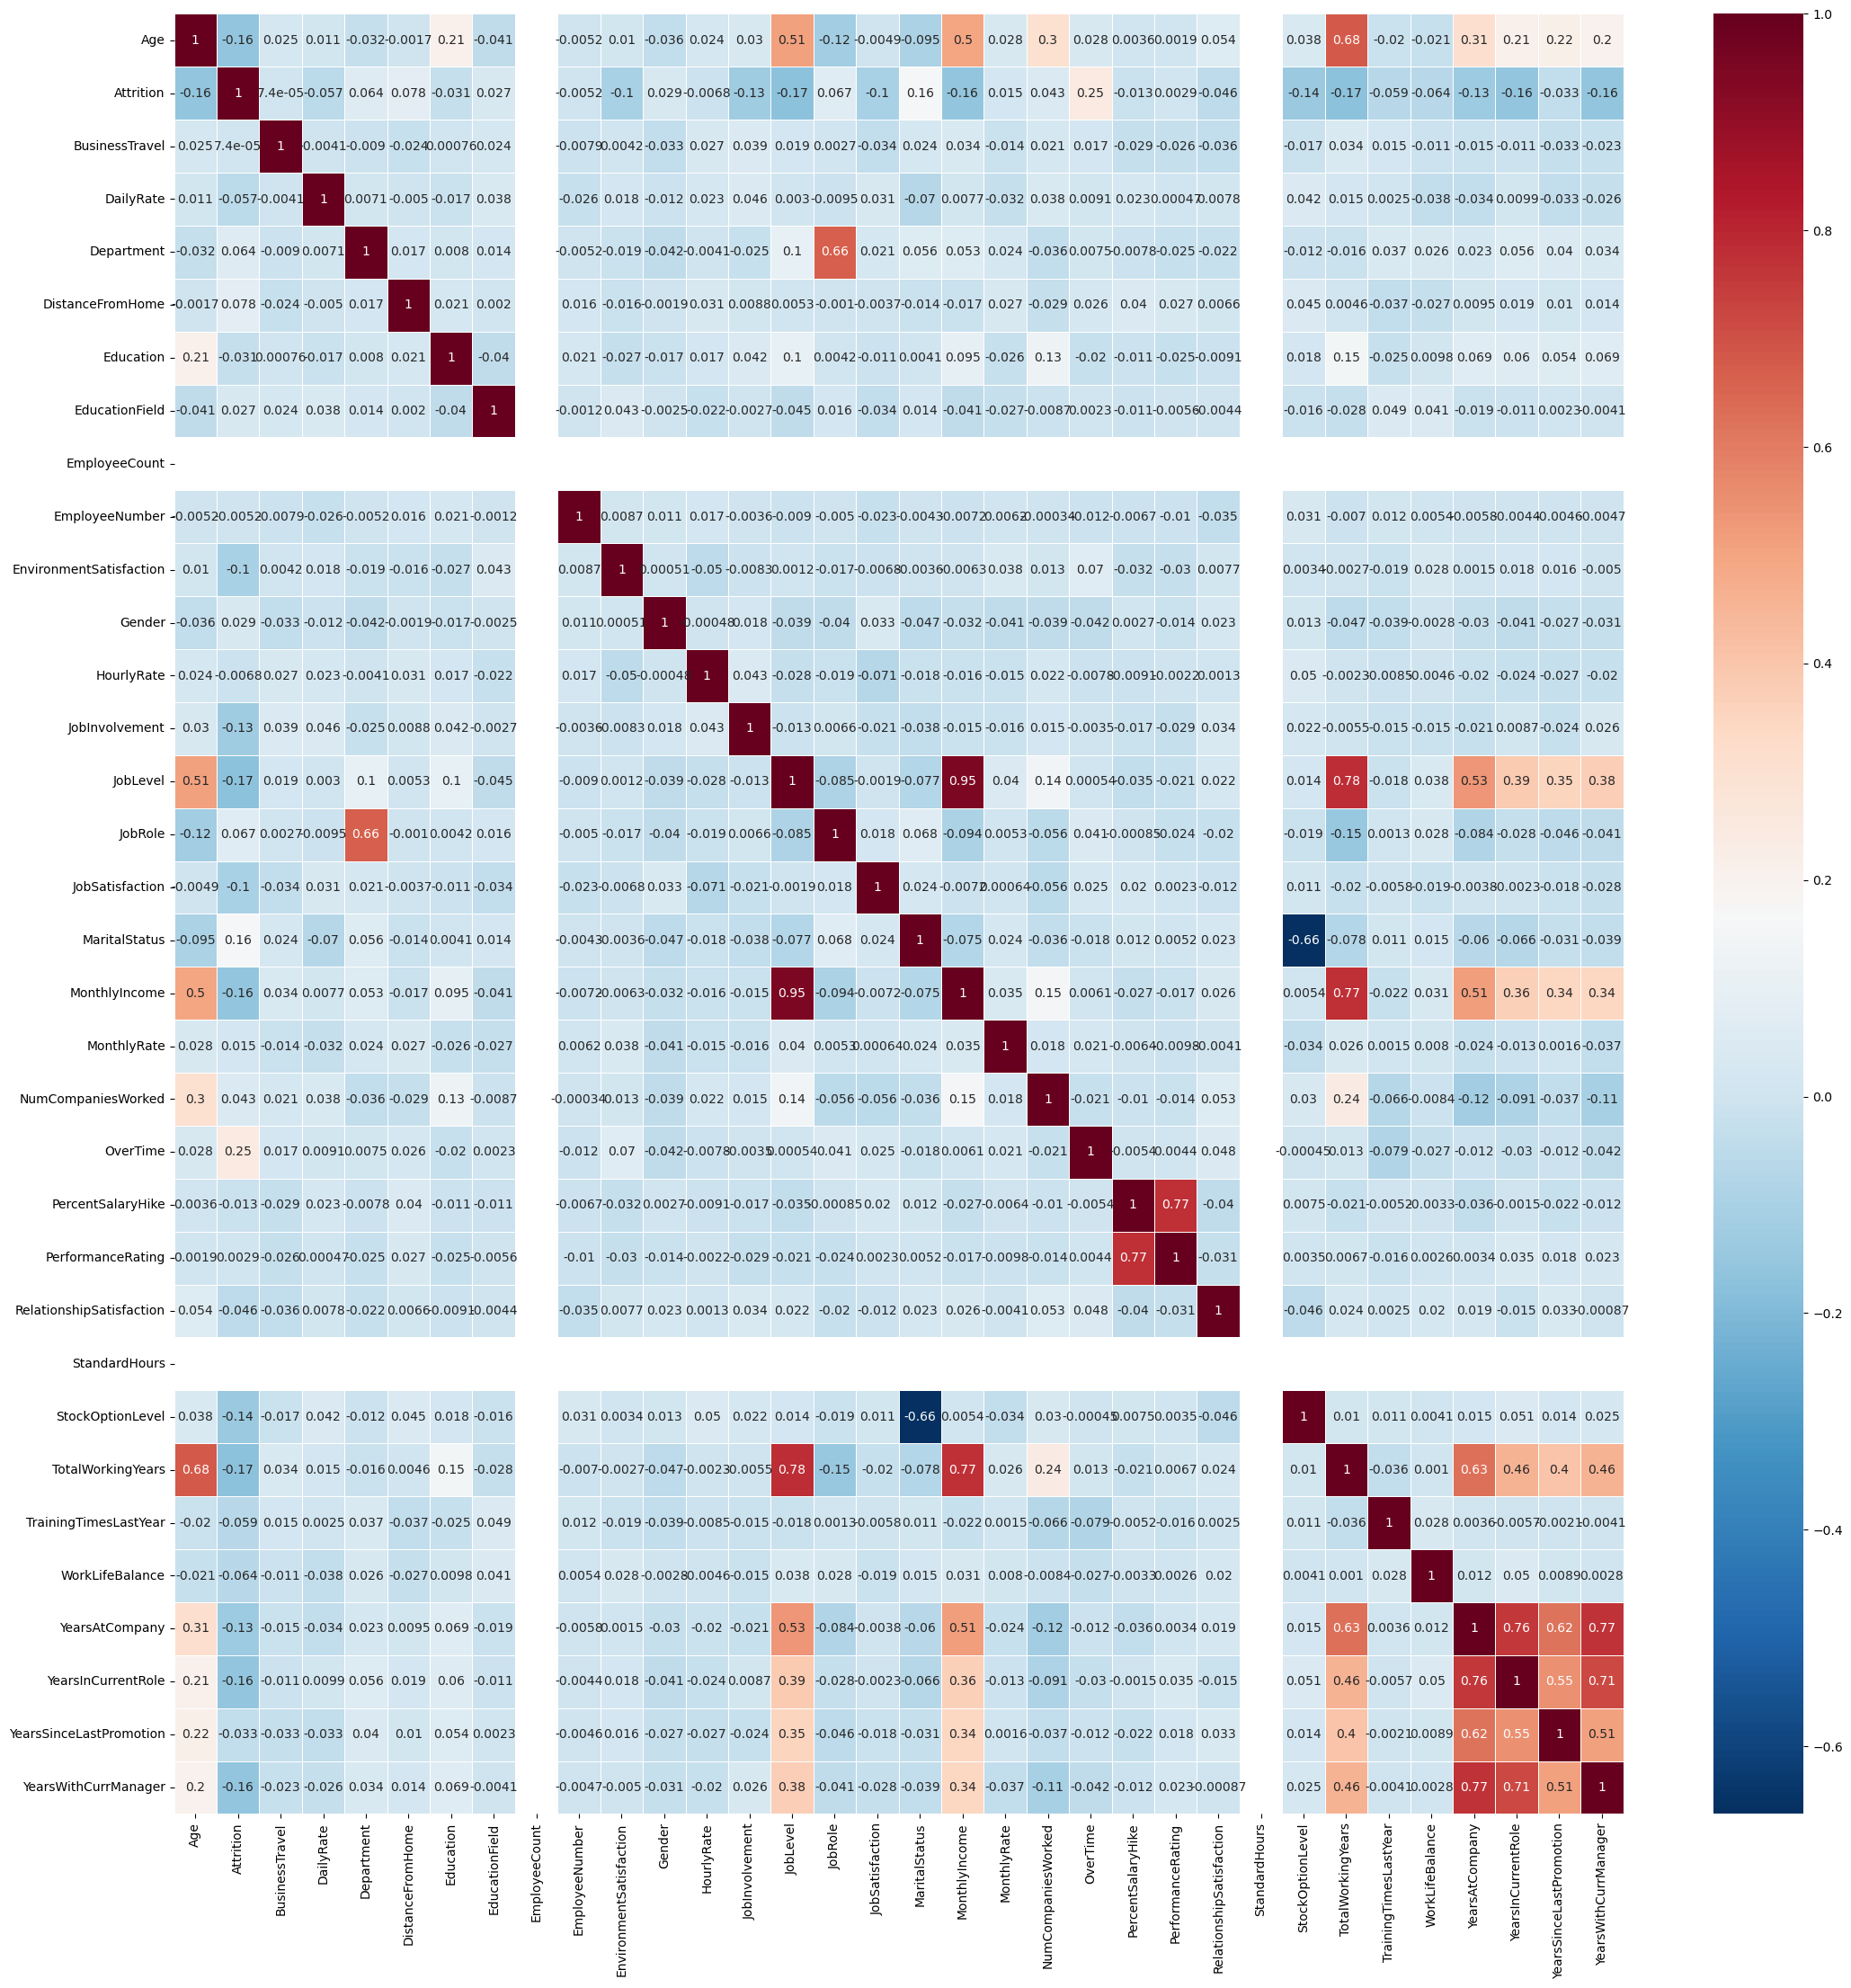

In [61]:
# After we changed all the categorical variables to numerical using mean encoding, 
# we can run pairwise correlation again to see the correlation between all the variables
pearson = encoded_df.corr(method='pearson')
pearson
plt.figure(figsize=(26, 26))
sns.heatmap(pearson, 
            xticklabels=pearson.columns,
            yticklabels=pearson.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [62]:
# Picking the features that have absolute correlation value greater than 0.1 

final_df = encoded_df[['Attrition', 'Age', 'BusinessTravel', 'EducationField', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'OverTime', 'StockOptionLevel', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager']]

In [63]:
# Separating dataset into x & y, where y is the target variable

x= final_df.drop(['Attrition'], axis=1).values
y= final_df['Attrition'].values

In [64]:
# Split the data into train test

x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2)

In [66]:
# Build the decision tree model
# Desicion tree using depth =2

model_dt_2 = DecisionTreeClassifier(random_state=12, max_depth=2)
model_dt_2.fit(x_train,y_train)
model_dt_2_score_train=model_dt_2.score(x_train, y_train)
print('Training score is:', model_dt_2_score_train)
model_dt_2.fit(x_test, y_test)
model_dt_2_score_test= model_dt_2.score(x_test, y_test)
print('Testing score is:', model_dt_2_score_test)

Training score is: 0.8469387755102041
Testing score is: 0.8520408163265306


In [67]:
# Desicion tree using depth =8

model_dt_8 = DecisionTreeClassifier(random_state=12, max_depth=8, min_samples_leaf=80, min_samples_split=200)
model_dt_8.fit(x_train,y_train)
model_dt_8_score_train=model_dt_8.score(x_train, y_train)
print('Training score is:', model_dt_8_score_train)
model_dt_8.fit(x_test, y_test)
model_dt_8_score_test= model_dt_8.score(x_test, y_test)
print('Testing score is:', model_dt_8_score_test)

Training score is: 0.8482142857142857
Testing score is: 0.8367346938775511


In [69]:
# Desicion tree using depth =8

model_dt_8 = DecisionTreeClassifier(random_state=12, max_depth=8, min_samples_leaf=30, min_samples_split=100)
model_dt_8.fit(x_train,y_train)
model_dt_8_score_train=model_dt_8.score(x_train, y_train)
print('Training score is:', model_dt_8_score_train)
model_dt_8.fit(x_test, y_test)
model_dt_8_score_test= model_dt_8.score(x_test, y_test)
print('Testing score is:', model_dt_8_score_test)

#y_pred_dt = model_dt_8.predict_proba(x_test)[:, 1]
#print("Probability is: ", y_pred_dt)

Training score is: 0.8622448979591837
Testing score is: 0.8520408163265306


In [65]:
# Hyper-Parameter Optimization using GridSearchCV

model_dt= DecisionTreeClassifier(random_state=12)
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [2,4,8,12],
             'min_samples_leaf': [20, 30, 40, 50,60], 
              'min_samples_split': [40, 50, 60, 70, 80, 100,200, 250, 300],
              'criterion': ['gini', 'entropy']
             }

cv_rf = GridSearchCV(model_dt, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(x_test, y_test)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 20, 'min_samples_split': 40}
Time taken in grid search:  4.58


In [70]:
# Set best parameters given by grid search 

model_dt.set_params(max_depth=4, 
                    min_samples_leaf=20, 
                    min_samples_split=40, 
                    criterion='gini')

DecisionTreeClassifier(max_depth=4, min_samples_leaf=20, min_samples_split=40,
                       random_state=12)

In [71]:
# Decision Tree

# Desicion tree using depth =4

model_dt_8 = DecisionTreeClassifier(random_state=12, max_depth=4, min_samples_leaf=20, min_samples_split=40)
model_dt_8.fit(x_train,y_train)
model_dt_8_score_train=model_dt_8.score(x_train, y_train)
print('Training score is:', model_dt_8_score_train)
model_dt_8.fit(x_test, y_test)
model_dt_8_score_test= model_dt_8.score(x_test, y_test)
print('Testing score is:', model_dt_8_score_test)

Training score is: 0.8635204081632653
Testing score is: 0.8639455782312925


In [72]:
# Decision Tree

model_dt = DecisionTreeClassifier(random_state=12, max_depth=4, min_samples_leaf=20, min_samples_split=40)
model_dt.fit(x_train, y_train)
y_pred_dt = model_dt_8.predict_proba(x_test)[:, 1]

In [73]:
#Performance matrix

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)
roc_auc_dt

0.8552887872628726

In [74]:
predictions = model_dt.predict(x_test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [75]:
y_actual_result = None
for i in range(len(predictions)):
    if(predictions[i]==1):
        y_actual_result = np.vstack((y_actual_result, y_test[i]))

In [76]:
# Recall

y_actual_result = y_actual_result.flatten()
count = 0
for result in y_actual_result:
    if (result==1):
        count = count+1
print('True yes|Predicted yes:')
print(count/float(len(y_actual_result)))

True yes|Predicted yes:
0.75


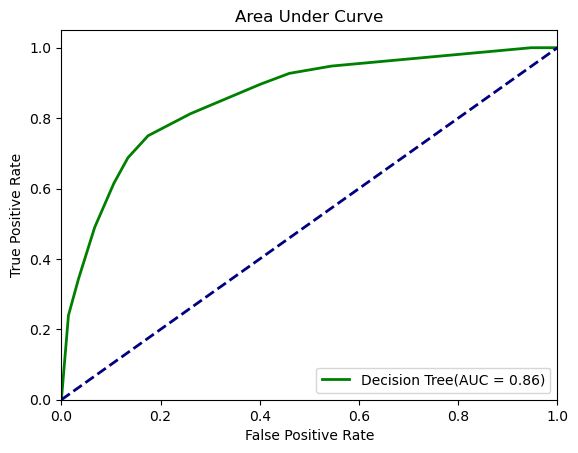

In [77]:
# Area under the Curve

plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

In [78]:
# Confusion Matrix

print(confusion_matrix(y_test, predictions))

[[489   3]
 [ 84  12]]


In [79]:
accuracy_score(y_test, predictions)

0.8520408163265306

In [80]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
    cm = confusion_matrix(y_test, model, labels=[0, 1])
    classes=["Success", "Default"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

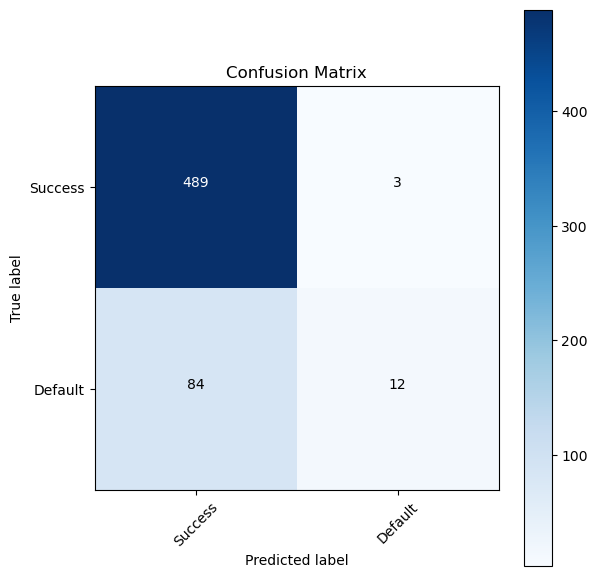

In [81]:
plt.figure(figsize=(6,6))
plot_confusion_matrix(predictions, normalize=False)
plt.show()